In [ ]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive  # Import for mounting Google Drive

# Mount Google Drive
drive.mount('/content/price')


# Load the dataset
data = pd.read_csv('/content/training_laptop.csv')

# Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(data.info())  # Overview of data structure

print("\nClass Distribution:")
print(data['Category'].value_counts())  # Class distribution

# Encoding "Relevance" labels to numeric values (for model training)
label_mapping = {'Medium': 2, 'Low': 1, 'High': 0}
data['label'] = data['Category'].map(label_mapping)

# Split dataset into train and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Preparing the data in the correct format for SimpleTransformers
train_df = pd.DataFrame({
    'text': train_data['Description'],  # Adjust column name if needed
    'labels': train_data['label']
})

val_df = pd.DataFrame({
    'text': val_data['Description'],  # Adjust column name if needed
    'labels': val_data['label']
})

# Display first few rows to verify format
print("Training Data Sample:")
print(train_df.head())

print("Validation Data Sample:")
print(val_df.head())


Drive already mounted at /content/price; to attempt to forcibly remount, call drive.mount("/content/price", force_remount=True).
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  1350 non-null   object
 1   Category     1350 non-null   object
dtypes: object(2)
memory usage: 21.2+ KB
None

Class Distribution:
Category
Low       450
High      450
Medium    450
Name: count, dtype: int64
Training Data Sample:
                                                   text  labels
755   Upgraded This laptop is manufactured by Dell w...       2
109   Upgraded This laptop is manufactured by Acer w...       1
1040  This laptop is manufactured by Dell with model...       0
548   This laptop is manufactured by Lenovo with mod...       0
1342  Lightweight This laptop is manufactured by Ver...       1
Validation Data Sample:
      

In [ ]:
import re

# Define a function to clean text data
def clean_text(text):
    if isinstance(text, str):  # Ensure text is a string
        # Convert to lowercase
        text = text.lower()

        # Remove special characters, numbers, and extra spaces
        text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces

        # Remove multiple spaces
        text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the dataset
train_df['text'] = train_df['text'].apply(clean_text)
val_df['text'] = val_df['text'].apply(clean_text)

# Display first few cleaned rows
print(train_df.head())
print(val_df.head())


                                                   text  labels
755   upgraded this laptop is manufactured by dell w...       2
109   upgraded this laptop is manufactured by acer w...       1
1040  this laptop is manufactured by dell with model...       0
548   this laptop is manufactured by lenovo with mod...       0
1342  lightweight this laptop is manufactured by ver...       1
                                                   text  labels
289   pro edition this laptop is manufactured by ace...       2
1036  gaming this laptop is manufactured by hp with ...       2
535   upgraded this laptop is manufactured by acer w...       2
346   gaming this laptop is manufactured by asus wit...       2
1075  gaming this laptop is manufactured by acer wit...       1


In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00
  

In [ ]:
# Import the necessary library
from simpletransformers.classification import ClassificationModel

# Define number of labels based on unique classes in dataset
num_labels = 3  # 'Strong', 'Medium', 'Low'

# Create a BERT model for text classification
bert_model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=num_labels,
    use_cuda=True  # Set use_cuda=True if using a GPU
)

# Create a RoBERTa model for text classification
roberta_model = ClassificationModel(
    'roberta',
    'roberta-base',
    num_labels=num_labels,
    use_cuda=True  # Set use_cuda=True if using a GPU
)

print("BERT and RoBERTa models initialized successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

BERT and RoBERTa models initialized successfully!


In [ ]:
# Import necessary libraries
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Define the number of labels (for multi-class classification)
num_labels = 3  # Labels: 'Strong', 'Medium', 'Low'

# Set up model arguments with custom hyperparameters
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Define the number of labels (for multi-class classification)
num_labels = 3  # Labels: 'Strong', 'Medium', 'Low'

# Set up model arguments with custom hyperparameters
model_args = ClassificationArgs(
    num_train_epochs=4,       # Increased epochs for better training
    train_batch_size=16,      # Adjusted for efficiency
    eval_batch_size=16,       # Matching train batch size
    learning_rate=2e-5,       # Slightly reduced learning rate for stability
    max_seq_length=256,       # Increased sequence length for better context
    weight_decay=0.01,        # Regularization to prevent overfitting
    warmup_ratio=0.1,         # 10% warm-up steps
    logging_steps=50,         # Log training progress every 50 steps
    save_steps=200,           # Save model every 200 steps
    evaluate_during_training=True,  # Evaluate during training
    evaluate_during_training_steps=100, # Evaluate every 100 steps
    save_best_model=True,     # Save the best model based on evaluation metric
    overwrite_output_dir=True # Ensure fresh training each run
)

# Train the BERT model with custom hyperparameters
bert_model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=num_labels,
    args=model_args,
    use_cuda=True  # Set to True if using a GPU
)

print("Training BERT model...")
bert_model.train_model(train_df, eval_df=val_df)

# Train the RoBERTa model with custom hyperparameters
roberta_model = ClassificationModel(
    'roberta',
    'roberta-base',
    num_labels=num_labels,
    args=model_args,
    use_cuda=True  # Set to True if using a GPU
)

print("Training RoBERTa model...")
# Pass the validation dataframe (val_df) to eval_df
roberta_model.train_model(train_df, eval_df=val_df)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training BERT model...


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 4 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training RoBERTa model...


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 4 of 4:   0%|          | 0/68 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(272,
 defaultdict(list,
             {'global_step': [68, 100, 136, 200, 204, 272],
              'train_loss': [0.20372772216796875,
               0.515289306640625,
               0.3366127014160156,
               0.024910688400268555,
               0.015778064727783203,
               0.008493900299072266],
              'mcc': [np.float64(0.5980977853011589),
               np.float64(0.8599432336894749),
               np.float64(0.9219148674853196),
               np.float64(0.9608793423482673),
               np.float64(0.9499265074866896),
               np.float64(0.9606795297605569)],
              'eval_loss': [0.5433108228094438,
               0.31016089285121246,
               0.17318086501430063,
               0.10674262649434454,
               0.1369992468286963,
               0.10212435140548383]}))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define metric functions
def accuracy(labels, preds):
    return accuracy_score(labels, preds)

def precision(labels, preds):
    return precision_score(labels, preds, average='weighted')

def recall(labels, preds):
    return recall_score(labels, preds, average='weighted')

def f1(labels, preds):
    return f1_score(labels, preds, average='weighted')

# Evaluate BERT model on validation data
result_bert, model_outputs_bert, wrong_predictions_bert = bert_model.eval_model(
    val_df,
    accuracy=accuracy,
    precision=precision,
    recall=recall,
    f1=f1
)

print("BERT Evaluation Results:")
print(result_bert)

# Evaluate RoBERTa model on validation data
result_roberta, model_outputs_roberta, wrong_predictions_roberta = roberta_model.eval_model(
    val_df,
    accuracy=accuracy,
    precision=precision,
    recall=recall,
    f1=f1
)

print("RoBERTa Evaluation Results:")
print(result_roberta)


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


BERT Evaluation Results:
{'mcc': np.float64(0.9174254087044508), 'accuracy': 0.9444444444444444, 'precision': 0.9460566813871065, 'recall': 0.9444444444444444, 'f1': 0.9439912339668312, 'eval_loss': 0.14023824496304288}


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


RoBERTa Evaluation Results:
{'mcc': np.float64(0.9606795297605569), 'accuracy': 0.9740740740740741, 'precision': 0.9741434587041822, 'recall': 0.9740740740740741, 'f1': 0.9740901437185158, 'eval_loss': 0.10212435140548383}


In [ ]:
  # Save the trained BERT model
  bert_model.save_model('/content/bert_best_model')

  # Save the trained RoBERTa model
  roberta_model.save_model('/content/roberta_best_model')

  print("Models saved successfully!")


Models saved successfully!


In [ ]:
# Save BERT model properly
bert_model.save_model('/content/bert_best_model')

# Save RoBERTa model properly
roberta_model.save_model('/content/roberta_best_model')


In [ ]:
import os

print("BERT Model Directory Contents:", os.listdir('/content/bert_best_model'))
print("RoBERTa Model Directory Contents:", os.listdir('/content/roberta_best_model'))


BERT Model Directory Contents: []
RoBERTa Model Directory Contents: []


In [ ]:
# Import necessary libraries
from transformers import BertForSequenceClassification, RobertaForSequenceClassification

# Manually save BERT model
bert_model.model.save_pretrained('/content/bert_best_model')
bert_model.tokenizer.save_pretrained('/content/bert_best_model')

# Manually save RoBERTa model
roberta_model.model.save_pretrained('/content/roberta_best_model')
roberta_model.tokenizer.save_pretrained('/content/roberta_best_model')


('/content/roberta_best_model/tokenizer_config.json',
 '/content/roberta_best_model/special_tokens_map.json',
 '/content/roberta_best_model/vocab.json',
 '/content/roberta_best_model/merges.txt',
 '/content/roberta_best_model/added_tokens.json',
 '/content/roberta_best_model/tokenizer.json')

In [ ]:
import os

print("BERT Model Directory Contents:", os.listdir('/content/bert_best_model'))
print("RoBERTa Model Directory Contents:", os.listdir('/content/roberta_best_model'))


BERT Model Directory Contents: ['config.json', 'vocab.txt', 'model.safetensors', 'tokenizer.json', 'tokenizer_config.json', 'special_tokens_map.json']
RoBERTa Model Directory Contents: ['vocab.json', 'config.json', 'merges.txt', 'model.safetensors', 'tokenizer.json', 'tokenizer_config.json', 'special_tokens_map.json']


In [ ]:
# Load the saved BERT model
bert_model = ClassificationModel('bert', '/content/bert_best_model', use_cuda=False)

# Load the saved RoBERTa model
roberta_model = ClassificationModel('roberta', '/content/roberta_best_model', use_cuda=False)

print("✅ Models loaded successfully!")


✅ Models loaded successfully!


In [ ]:
# Sample real-world job descriptions (similar to dataset format)
real_world_text = [

"This laptop features an Intel Core i3 processor, 4GB RAM, and a 256GB SSD. It is an entry-level option suitable for basic tasks like web browsing and document editing.",
"Upgraded This laptop is manufactured by Samsung with model Chromebook 3 and falls under the category Netbook Screen Size: 11 6 inches Screen: 1366x768 CPU: Apple M1 Celeron Dual Core N3060 1 6GHz with RAM 4GB and storage capacity 16GB Flash Storage GPU: Apple M1 HD Graphics 400 OS: Chrome OS Weight: 1 15kg Ideal for coding development and multitasking",
"Enhanced This laptop is manufactured by Vero with model V131 (X5-Z8350/4GB/32GB/FHD/W10) and falls under the category Notebook Screen Size: 13 3 inches Screen: Full HD 1920x1080 CPU: Snapdragon Atom X5-Z8350 1 44GHz with RAM 4GB and storage capacity 32GB Flash Storage GPU: Snapdragon HD Graphics 400 OS: macOS Weight: 1 35kg High-performance laptop with fast processing"
]

# Predict using BERT model
predictions_bert, _ = bert_model.predict(real_world_text)
print(f"BERT Predictions: {predictions_bert}")

# Predict using RoBERTa model
predictions_roberta, _ = roberta_model.predict(real_world_text)
print(f"RoBERTa Predictions: {predictions_roberta}")


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

BERT Predictions: [0 2 1]


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

RoBERTa Predictions: [0 2 2]


In [ ]:
!pip install matplotlib seaborn wordcloud scikit-learn


# **Exploratory Data Analysis (EDA)**

🎯 TARGET CLASS DISTRIBUTION


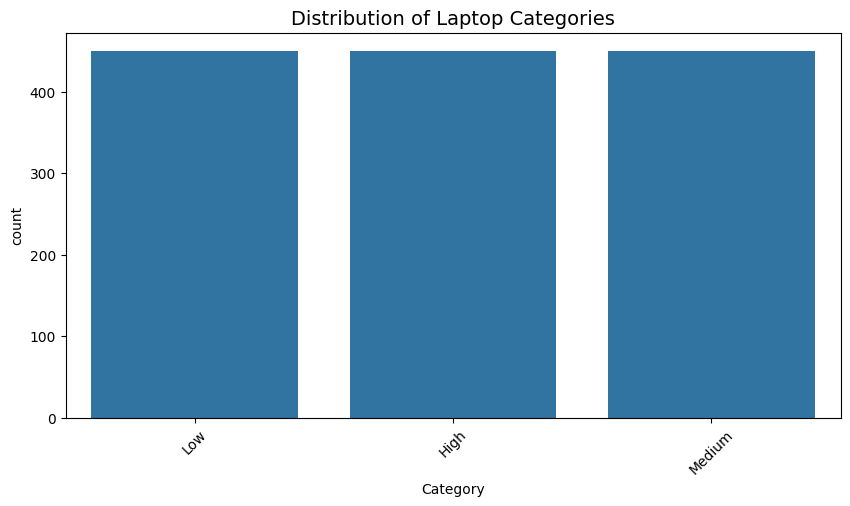


📏 TEXT LENGTH ANALYSIS


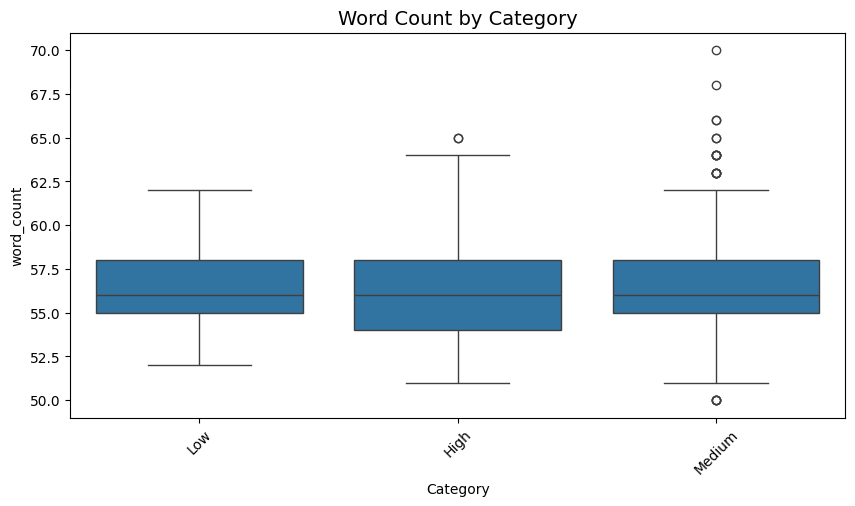

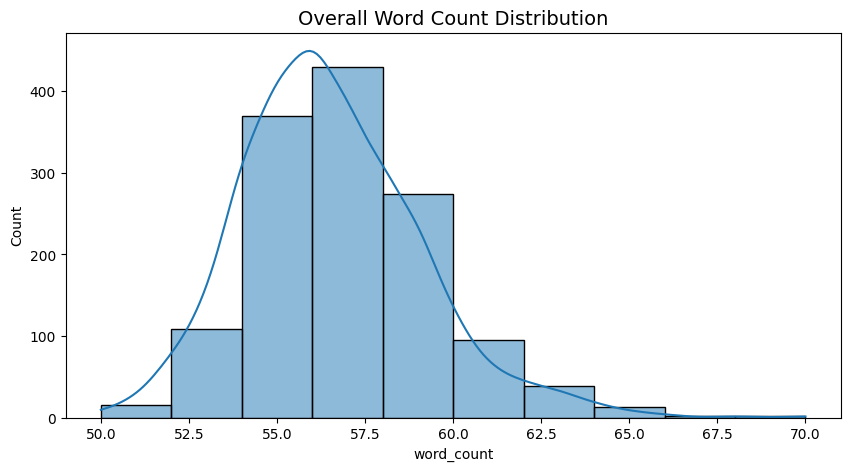


☁️ WORD CLOUD FOR 'High' CATEGORY


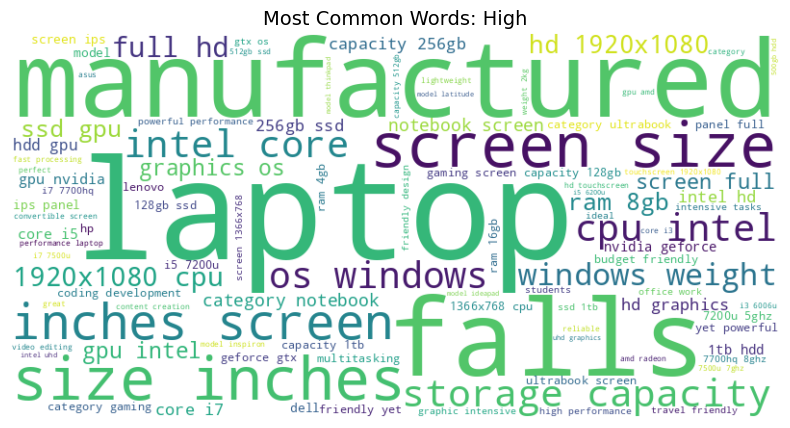


🔑 TOP KEYWORDS BY CATEGORY

Category: Low
Top keywords: 32gb, laptop, os, screen, storage

Category: High
Top keywords: hd, intel, laptop, os, screen

Category: Medium
Top keywords: 4gb, laptop, os, screen, storage


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
file_path = "training_laptop.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Define the target and text columns
target_col = 'Category'
text_col = 'Description'

# 1. Target Class Distribution Plot
print("🎯 TARGET CLASS DISTRIBUTION")
print("=" * 50)
plt.figure(figsize=(10, 5))
sns.countplot(x=target_col, data=df, order=df[target_col].value_counts().index)
plt.title("Distribution of Laptop Categories", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2. Text Length Analysis (Word Count by Category)
print("\n📏 TEXT LENGTH ANALYSIS")
print("=" * 50)

# Adding word count and character count columns
df['char_count'] = df[text_col].apply(lambda x: len(str(x)))
df['word_count'] = df[text_col].apply(lambda x: len(str(x).split()))

# Boxplot for word count by category
plt.figure(figsize=(10, 5))
sns.boxplot(x=target_col, y='word_count', data=df)
plt.title("Word Count by Category", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Histogram for overall word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=10, kde=True)
plt.title("Overall Word Count Distribution", fontsize=14)
plt.show()

# 3. Word Cloud for 'High' Category
print("\n☁️ WORD CLOUD FOR 'High' CATEGORY")
print("=" * 50)
text = ' '.join(df[df[target_col] == 'High'][text_col].apply(lambda x: str(x).lower()))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Common Words: High", fontsize=14)
plt.axis('off')
plt.show()

# 4. Top Keywords by Category (Using CountVectorizer)
print("\n🔑 TOP KEYWORDS BY CATEGORY")
print("=" * 50)

top_keywords = {}
for category in df[target_col].unique():
    category_texts = df[df[target_col] == category][text_col].apply(lambda x: str(x).lower())
    cv = CountVectorizer(stop_words='english', max_features=5)  # Limiting to top 5 words
    cv.fit(category_texts)
    top_keywords[category] = cv.get_feature_names_out()

# Print top keywords for each category
for category, keywords in top_keywords.items():
    print(f"\nCategory: {category}")
    print("Top keywords:", ", ".join(keywords))
